<a href="https://colab.research.google.com/github/Gopikasri-lab/projects/blob/main/Load_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Loading

In [ ]:
df = pd.read_csv('Load_History .csv')

In [ ]:
df.head()

,Unnamed: 0,POWER_MW,Temp_FC,Rain_FC,is_holiday
0,2022-01-01 00:00:00,1420.568008,24.715466,0.107205,1
1,2022-01-01 01:00:00,1370.015054,24.479847,0.087264,1
2,2022-01-01 02:00:00,1332.844189,24.229276,0.021265,1
3,2022-01-01 03:00:00,1300.437874,23.967832,0.023627,1
4,2022-01-01 04:00:00,1290.500864,24.299130,0.014556,1


In [ ]:
#indexing
df=df.set_index('Unnamed: 0')




In [ ]:
df.tail()

,POWER_MW,Temp_FC,Rain_FC,is_holiday
Unnamed: 0,,,,
2024-01-25 19:00:00,NaN,26.654189,0.008826,0
2024-01-25 20:00:00,NaN,25.975518,0.000763,0
2024-01-25 21:00:00,NaN,25.444038,0.006187,0
2024-01-25 22:00:00,NaN,25.015656,0.021945,0
2024-01-25 23:00:00,NaN,24.601591,0.038381,0


In [ ]:
df.index = pd.to_datetime(df.index)
df.head()


,POWER_MW,Temp_FC,Rain_FC,is_holiday
Unnamed: 0,,,,
2022-01-01 00:00:00,1420.568008,24.715466,0.107205,1
2022-01-01 01:00:00,1370.015054,24.479847,0.087264,1
2022-01-01 02:00:00,1332.844189,24.229276,0.021265,1
2022-01-01 03:00:00,1300.437874,23.967832,0.023627,1
2022-01-01 04:00:00,1290.500864,24.299130,0.014556,1


In [ ]:
#Insights of the distrubution of the dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18120 entries, 2022-01-01 00:00:00 to 2024-01-25 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   POWER_MW    17158 non-null  float64
 1   Temp_FC     18101 non-null  float64
 2   Rain_FC     18104 non-null  float64
 3   is_holiday  18120 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 707.8 KB
None
           POWER_MW       Temp_FC       Rain_FC    is_holiday
count  17158.000000  18101.000000  18104.000000  18120.000000
mean    1611.294723     26.417082      0.486610      0.083444
std      224.220993      2.373485      0.934296      0.276559
min      980.271083     20.142269      0.000000      0.000000
25%     1453.165813     24.689717      0.009598      0.000000
50%     1596.547341     26.053240      0.089319      0.000000
75%     1757.637918     27.778399      0.508387      0.000000
max     2496.676625     34.799697     10.296448      1.000

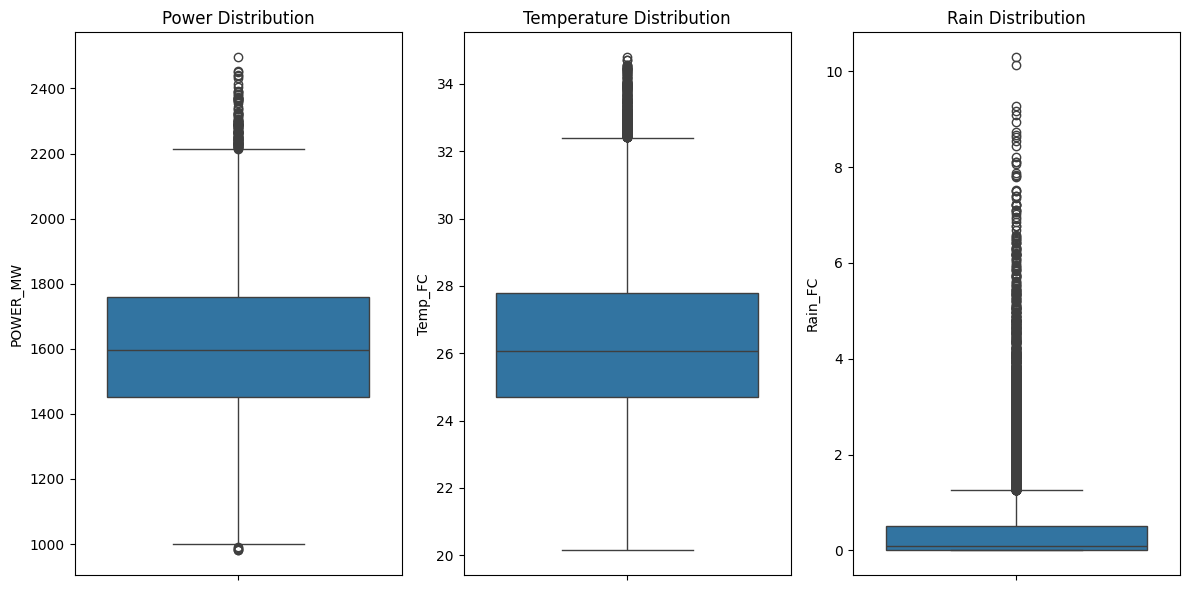

In [ ]:


# Create the box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['POWER_MW'])
plt.title('Power Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Temp_FC'])
plt.title('Temperature Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Rain_FC'])
plt.title('Rain Distribution')

plt.tight_layout()
plt.show()

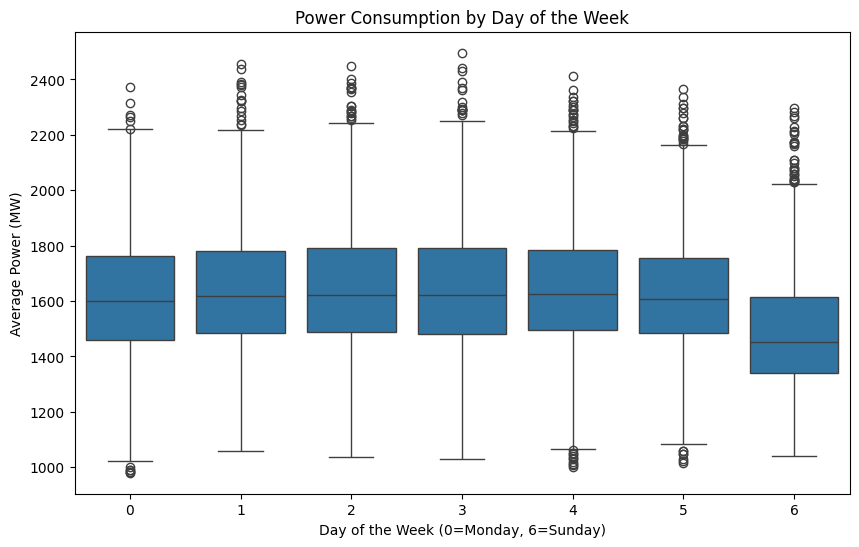

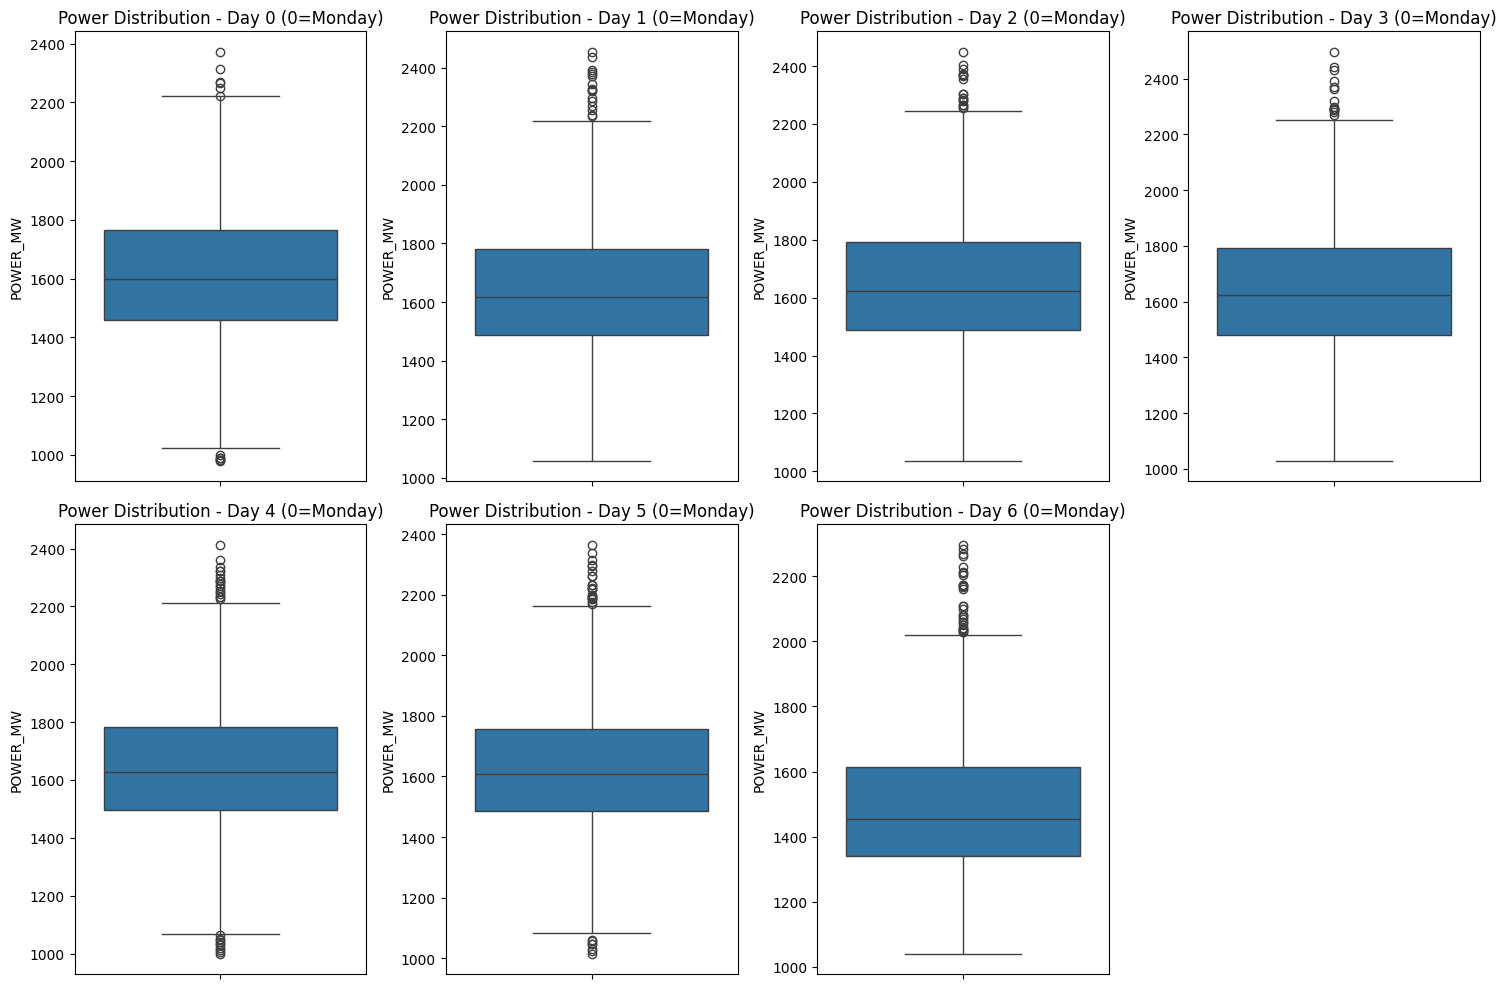

In [ ]:


# Assuming 'df' is your DataFrame and the index is a datetime object.
# If not, ensure your index is datetime type: df.index = pd.to_datetime(df.index)

# Add a 'DayofWeek' column
df['DayofWeek'] = df.index.dayofweek  # Monday=0, Sunday=6

# Group data by day of the week and calculate the mean power
daily_avg_power = df.groupby('DayofWeek')['POWER_MW'].mean()


plt.figure(figsize=(10, 6))
sns.boxplot(x='DayofWeek', y='POWER_MW', data=df)
plt.title('Power Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Power (MW)')
plt.show()


# Create separate box plots for each day
plt.figure(figsize=(15, 10))

for day in range(7):
    plt.subplot(2, 4, day + 1)  # Adjust subplot grid if needed
    day_data = df[df['DayofWeek'] == day]
    sns.boxplot(y=day_data['POWER_MW'])
    plt.title(f'Power Distribution - Day {day} (0=Monday)')

plt.tight_layout()
plt.show()

In [ ]:


# ... (your existing code)

# Handle missing values using interpolation for 'POWER', 'TEMP', and 'RAIN'
df['POWER_MW'] = df['POWER_MW'].interpolate(method='linear')
df['Temp_FC'] = df['Temp_FC'].interpolate(method='linear')
df['Rain_FC'] = df['Rain_FC'].interpolate(method='linear')

# Verify the missing values have been handled
print(df.isnull().sum())

POWER_MW      0
Temp_FC       0
Rain_FC       0
is_holiday    0
DayofWeek     0
hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dtype: int64


# EDA



checking for seasonality

In [ ]:
# function to derive hourly,dayofweek, month data from index
def create_feature(subset_data):

    subset_data['hour'] = subset_data.index.hour
    subset_data['dayofweek'] = subset_data.index.day_of_week
    subset_data['quarter']=subset_data.index.quarter
    subset_data['month']=subset_data.index.month
    subset_data['year']=subset_data.index.year
    subset_data['dayofyear']=subset_data.index.dayofyear
    return subset_data

In [ ]:
create_feature(df)
df



,POWER_MW,Temp_FC,Rain_FC,is_holiday,DayofWeek,hour,dayofweek,quarter,month,year,dayofyear
Unnamed: 0,,,,,,,,,,,
2022-01-01 00:00:00,1420.568008,24.715466,0.107205,1,5,0,5,1,1,2022,1
2022-01-01 01:00:00,1370.015054,24.479847,0.087264,1,5,1,5,1,1,2022,1
2022-01-01 02:00:00,1332.844189,24.229276,0.021265,1,5,2,5,1,1,2022,1
2022-01-01 03:00:00,1300.437874,23.967832,0.023627,1,5,3,5,1,1,2022,1
2022-01-01 04:00:00,1290.500864,24.299130,0.014556,1,5,4,5,1,1,2022,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25 19:00:00,NaN,26.654189,0.008826,0,3,19,3,1,1,2024,25
2024-01-25 20:00:00,NaN,25.975518,0.000763,0,3,20,3,1,1,2024,25
2024-01-25 21:00:00,NaN,25.444038,0.006187,0,3,21,3,1,1,2024,25


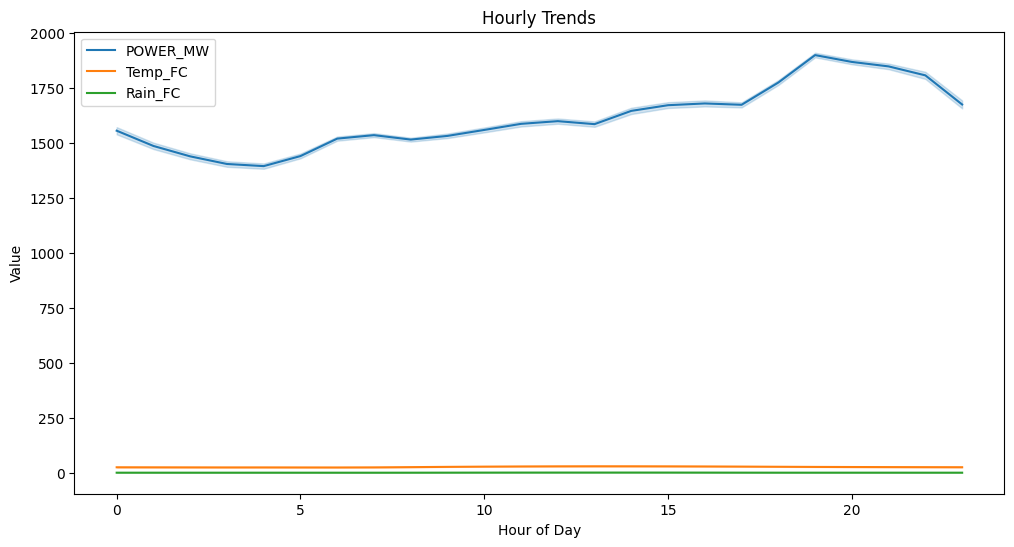

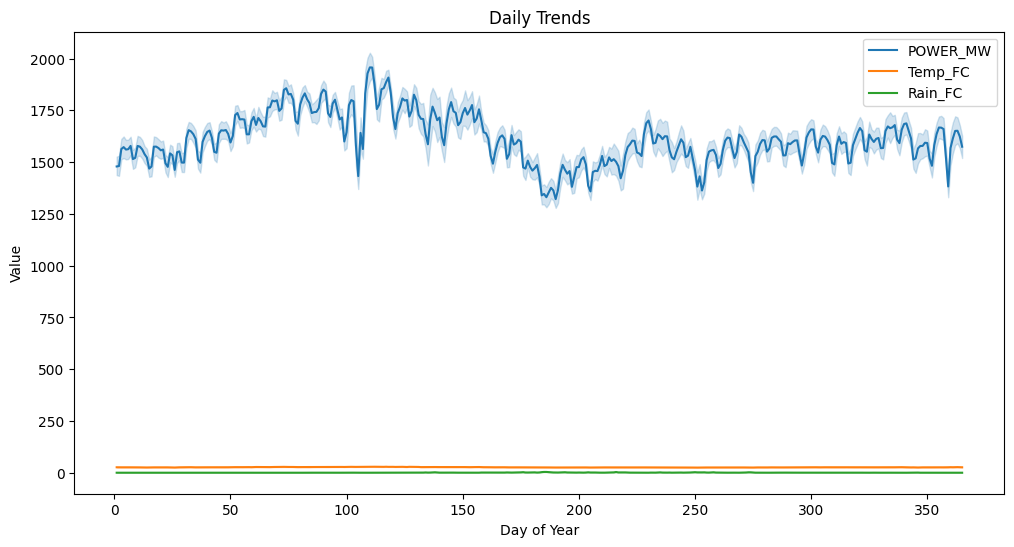

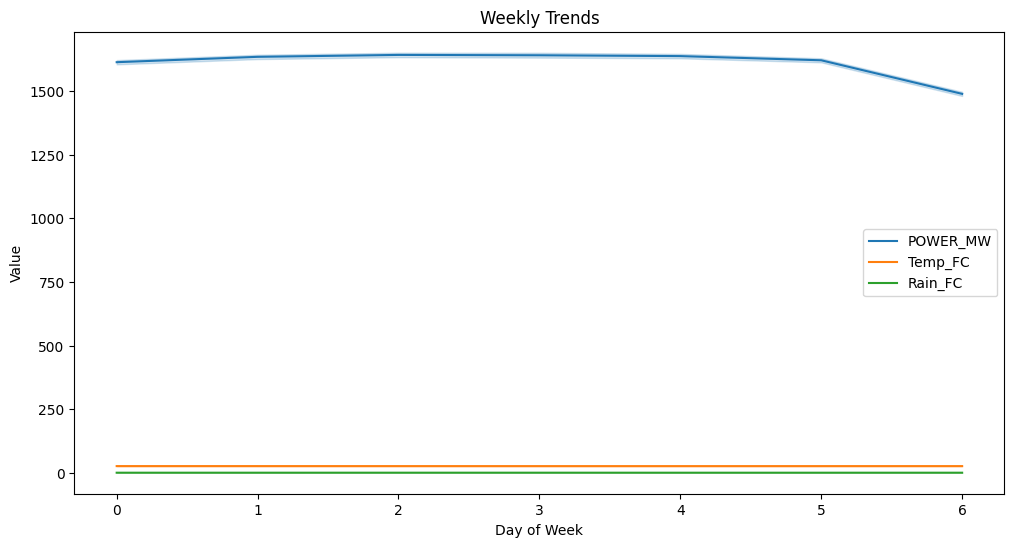

In [ ]:


# Plotting hourly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index.hour, y='POWER_MW', data=df, label='POWER_MW')
sns.lineplot(x=df.index.hour, y='Temp_FC', data=df, label='Temp_FC')
sns.lineplot(x=df.index.hour, y='Rain_FC', data=df, label='Rain_FC')
plt.title('Hourly Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotting daily trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index.dayofyear, y='POWER_MW', data=df, label='POWER_MW')
sns.lineplot(x=df.index.dayofyear, y='Temp_FC', data=df, label='Temp_FC')
sns.lineplot(x=df.index.dayofyear, y='Rain_FC', data=df, label='Rain_FC')
plt.title('Daily Trends')
plt.xlabel('Day of Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plotting weekly trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index.dayofweek, y='POWER_MW', data=df, label='POWER_MW')
sns.lineplot(x=df.index.dayofweek, y='Temp_FC', data=df, label='Temp_FC')
sns.lineplot(x=df.index.dayofweek, y='Rain_FC', data=df, label='Rain_FC')
plt.title('Weekly Trends')
plt.xlabel('Day of Week')
plt.ylabel('Value')
plt.legend()
plt.show()

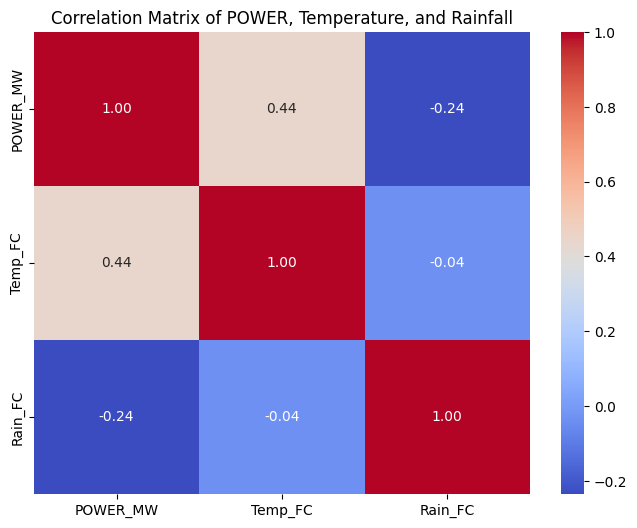

In [ ]:


# Calculate the correlation matrix
correlation_matrix = df[['POWER_MW', 'Temp_FC', 'Rain_FC']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of POWER, Temperature, and Rainfall')
plt.show()

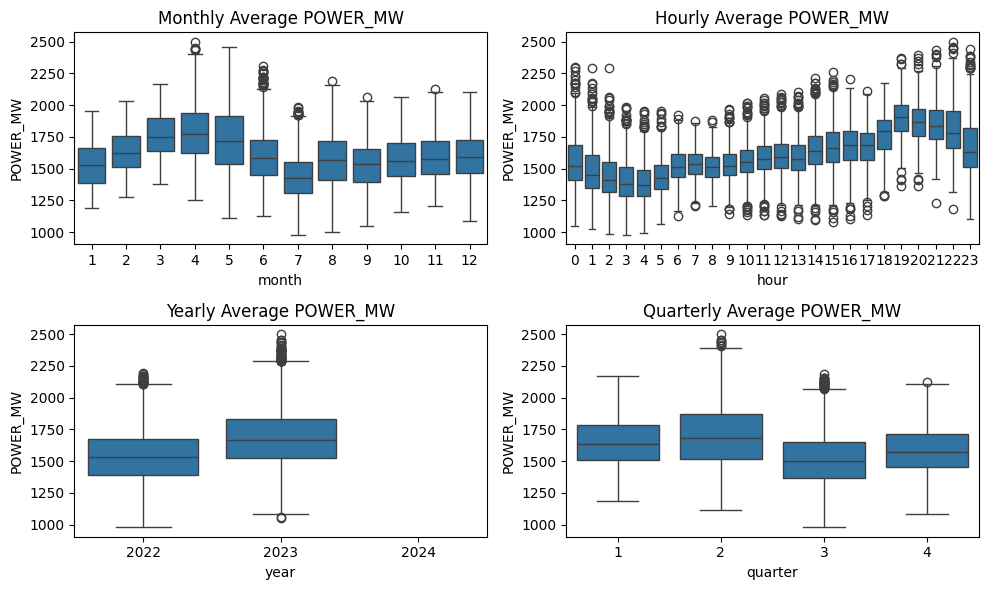

In [ ]:


# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='month', y='POWER_MW', data=df)
plt.title('Monthly Average POWER_MW')

plt.subplot(2, 2, 2)
sns.boxplot(x='hour', y='POWER_MW', data=df)
plt.title('Hourly Average POWER_MW')

plt.subplot(2, 2, 3)
sns.boxplot(x='year', y='POWER_MW', data=df)
plt.title('Yearly Average POWER_MW')

plt.subplot(2, 2, 4)
sns.boxplot(x='quarter', y='POWER_MW', data=df)
plt.title('Quarterly Average POWER_MW')

plt.tight_layout()
plt.show()

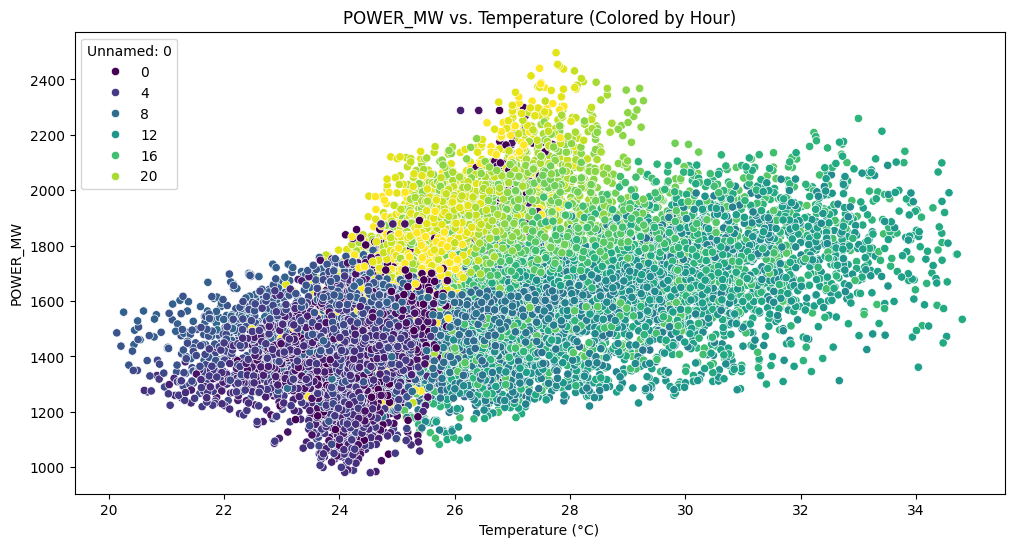

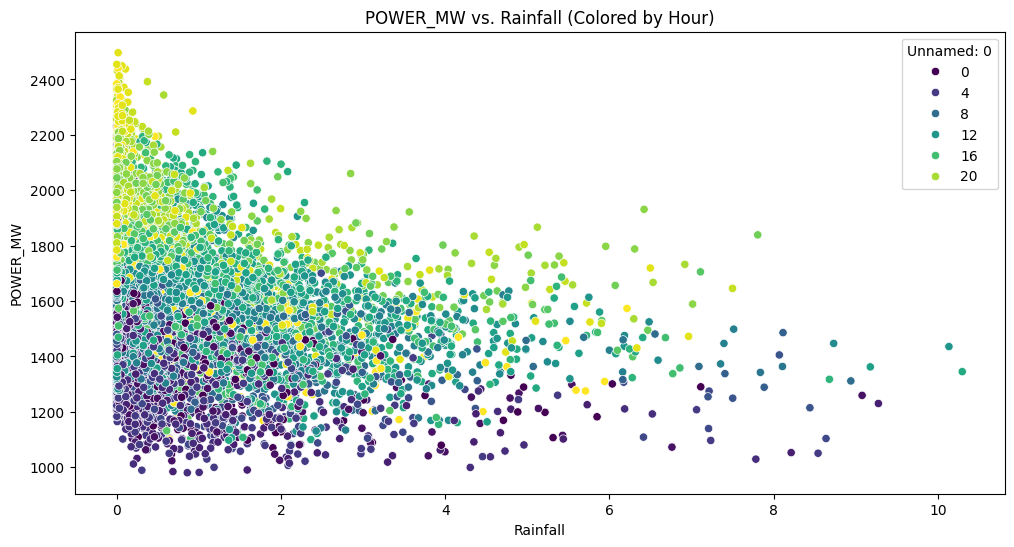

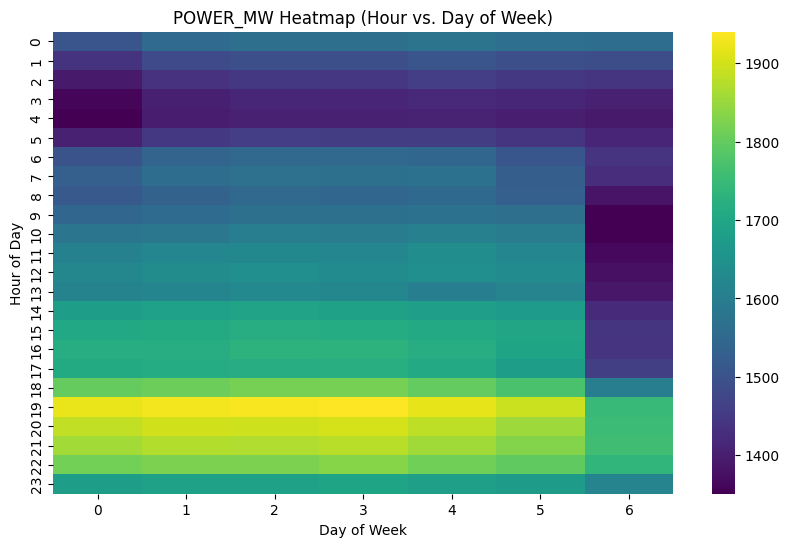

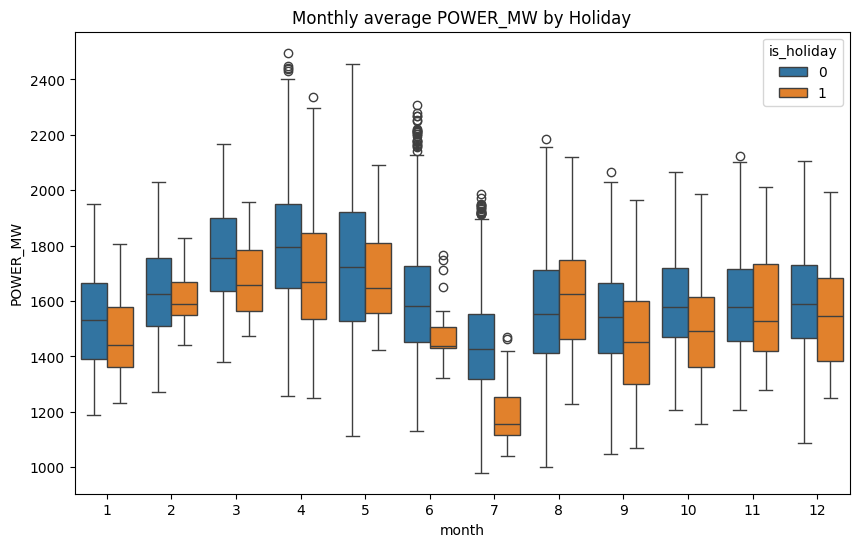

In [ ]:


# Plotting relationships between POWER_MW and weather/holidays

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temp_FC', y='POWER_MW', data=df, hue=df.index.hour, palette='viridis')
plt.title('POWER_MW vs. Temperature (Colored by Hour)')
plt.xlabel('Temperature (°C)')
plt.ylabel('POWER_MW')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rain_FC', y='POWER_MW', data=df, hue=df.index.hour, palette='viridis')
plt.title('POWER_MW vs. Rainfall (Colored by Hour)')
plt.xlabel('Rainfall')
plt.ylabel('POWER_MW')
plt.show()


# Assuming 'Holiday' column exists in your DataFrame (replace if different)
if 'Holiday' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Holiday', y='POWER_MW', data=df)
    plt.title('POWER_MW Distribution by Holiday')
    plt.show()


# More detailed visualizations with time components:

# Example using a heatmap to show POWER_MW across hours and days
power_pivot = pd.pivot_table(df, values='POWER_MW', index=df.index.hour, columns=df.index.dayofweek)
plt.figure(figsize=(10, 6))
sns.heatmap(power_pivot, cmap='viridis')
plt.title('POWER_MW Heatmap (Hour vs. Day of Week)')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

# Example:  POWER_MW across months
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='POWER_MW', data=df, hue='is_holiday')
plt.title('Monthly average POWER_MW by Holiday')
plt.show()

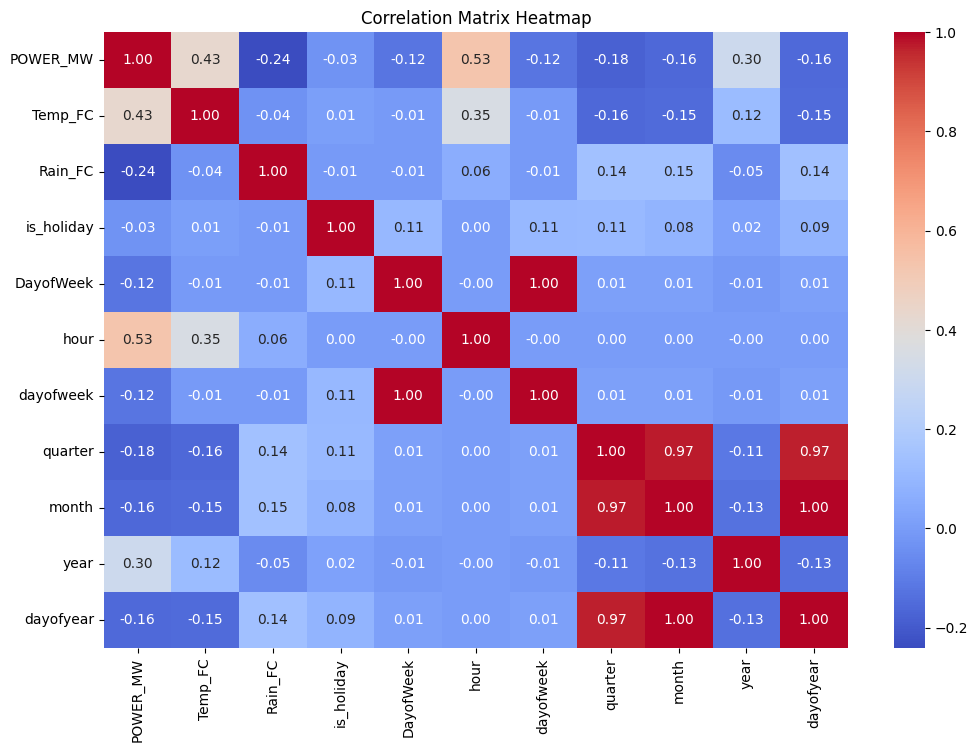

In [ ]:


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

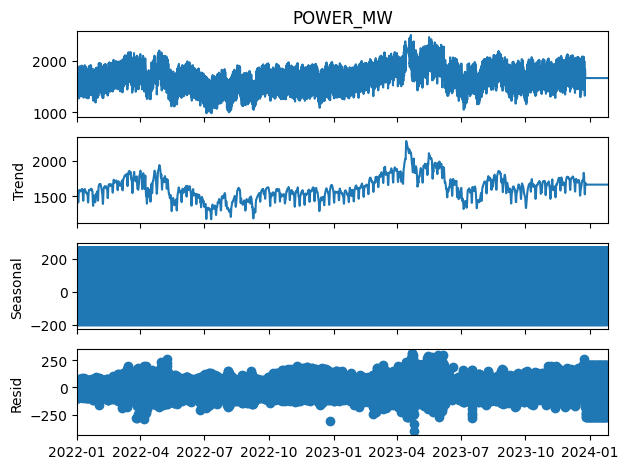

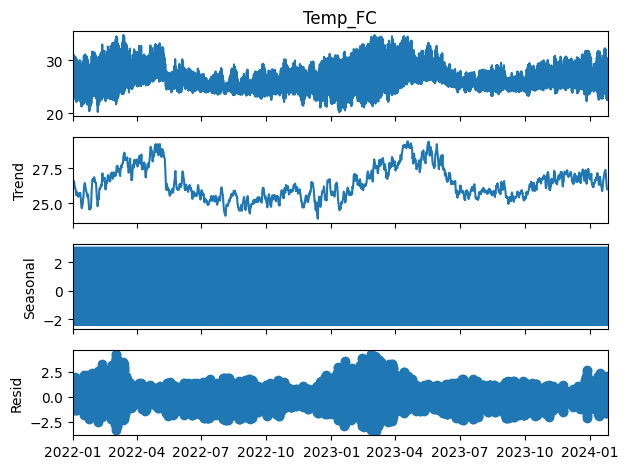

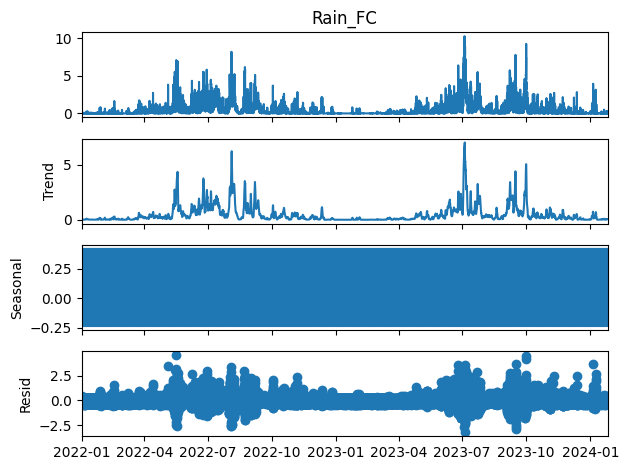

In [ ]:


# Decompose the time series to identify trends and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

# Example decomposition for 'POWER_MW'
result = seasonal_decompose(df['POWER_MW'], model='additive', period=24) # Assuming daily seasonality
result.plot()
plt.show()

# Example decomposition for 'Temp_FC'
result_temp = seasonal_decompose(df['Temp_FC'], model='additive', period=24) # Assuming daily seasonality
result_temp.plot()
plt.show()

# Example decomposition for 'Rain_FC'
result_rain = seasonal_decompose(df['Rain_FC'], model='additive', period=24) # Assuming daily seasonality
result_rain.plot()
plt.show()

In [ ]:


# Create lag features for POWER_MW
df['POWER_MW_lag1'] = df['POWER_MW'].shift(1)  # Previous hour
df['POWER_MW_lag24'] = df['POWER_MW'].shift(24) # Previous day

# You can add more lags as needed, e.g.,
# df['POWER_MW_lag48'] = df['POWER_MW'].shift(48) # Two days ago

# Handle the newly introduced NaN values due to shifting
df['POWER_MW_lag1'] = df['POWER_MW_lag1'].interpolate(method='linear')
df['POWER_MW_lag24'] = df['POWER_MW_lag24'].interpolate(method='linear')
# ... handle other lag features similarly

# Now you have lag features in your DataFrame
print(df.head())

                        POWER_MW    Temp_FC   Rain_FC  is_holiday  DayofWeek  \
Unnamed: 0                                                                     
2022-01-01 00:00:00  1420.568008  24.715466  0.107205           1          5   
2022-01-01 01:00:00  1370.015054  24.479847  0.087264           1          5   
2022-01-01 02:00:00  1332.844189  24.229276  0.021265           1          5   
2022-01-01 03:00:00  1300.437874  23.967832  0.023627           1          5   
2022-01-01 04:00:00  1290.500864  24.299130  0.014556           1          5   

                     hour  dayofweek  quarter  month  year  dayofyear  \
Unnamed: 0                                                              
2022-01-01 00:00:00     0          5        1      1  2022          1   
2022-01-01 01:00:00     1          5        1      1  2022          1   
2022-01-01 02:00:00     2          5        1      1  2022          1   
2022-01-01 03:00:00     3          5        1      1  2022          1   
2

In [ ]:


# Check for missing values after interpolation
print(df.isnull().sum())

POWER_MW           0
Temp_FC            0
Rain_FC            0
is_holiday         0
DayofWeek          0
hour               0
dayofweek          0
quarter            0
month              0
year               0
dayofyear          0
POWER_MW_lag1      1
POWER_MW_lag24    24
dtype: int64


In [ ]:


# Calculate rolling average for 'POWER_MW' with a window of 24 hours
df['POWER_MW_rolling_avg_24h'] = df['POWER_MW'].rolling(window=24).mean()

# Fill NaN values created by the rolling average calculation (first 23 hours)
df['POWER_MW_rolling_avg_24h'] = df['POWER_MW_rolling_avg_24h'].fillna(method='bfill')

# You can calculate rolling averages for other columns similarly
# For example, a 7-day rolling average for 'Temp_FC':
df['Temp_FC_rolling_avg_7d'] = df['Temp_FC'].rolling(window=24 * 7).mean()
df['Temp_FC_rolling_avg_7d'] = df['Temp_FC_rolling_avg_7d'].fillna(method='bfill')

# Print the first few rows to check the results
print(df.head(30))

                        POWER_MW    Temp_FC   Rain_FC  is_holiday  DayofWeek  \
Unnamed: 0                                                                     
2022-01-01 00:00:00  1420.568008  24.715466  0.107205           1          5   
2022-01-01 01:00:00  1370.015054  24.479847  0.087264           1          5   
2022-01-01 02:00:00  1332.844189  24.229276  0.021265           1          5   
2022-01-01 03:00:00  1300.437874  23.967832  0.023627           1          5   
2022-01-01 04:00:00  1290.500864  24.299130  0.014556           1          5   
2022-01-01 05:00:00  1333.147007  24.060605  0.024647           1          5   
2022-01-01 06:00:00  1414.531980  23.878871  0.004802           1          5   
2022-01-01 07:00:00  1475.900660  24.085607  0.000175           1          5   
2022-01-01 08:00:00  1483.568103  25.279907  0.000282           1          5   
2022-01-01 09:00:00  1495.026083  26.695060  0.000354           1          5   
2022-01-01 10:00:00  1537.952750  27.878

<ipython-input-28-aff81f50a4ef>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['POWER_MW_rolling_avg_24h'] = df['POWER_MW_rolling_avg_24h'].fillna(method='bfill')
<ipython-input-28-aff81f50a4ef>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Temp_FC_rolling_avg_7d'] = df['Temp_FC_rolling_avg_7d'].fillna(method='bfill')


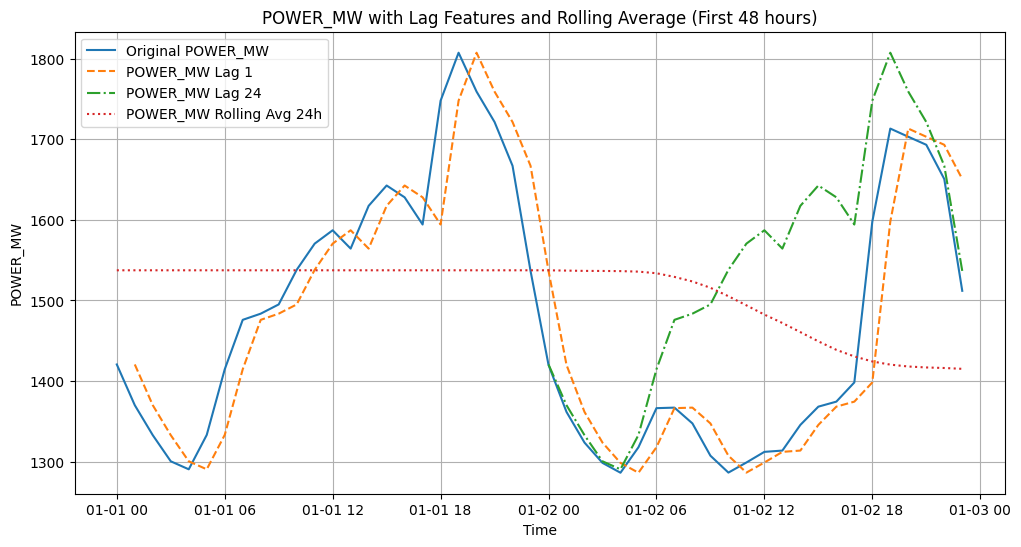

In [ ]:


# ... (your existing code)

# Create lag features for POWER_MW
df['POWER_MW_lag1'] = df['POWER_MW'].shift(1)  # Previous hour
df['POWER_MW_lag24'] = df['POWER_MW'].shift(24) # Previous day

# ... (rest of your lag feature creation and handling)


# Highlight the difference:  Before and After Lag/Rolling Average

# Select a small time window for clear visualization (e.g., the first 48 hours)
small_window = df.head(48)

plt.figure(figsize=(12, 6))
plt.plot(small_window.index, small_window['POWER_MW'], label='Original POWER_MW')
plt.plot(small_window.index, small_window['POWER_MW_lag1'], label='POWER_MW Lag 1', linestyle='--')
plt.plot(small_window.index, small_window['POWER_MW_lag24'], label='POWER_MW Lag 24', linestyle='-.')

# Add rolling average plot
plt.plot(small_window.index, small_window['POWER_MW_rolling_avg_24h'], label='POWER_MW Rolling Avg 24h', linestyle=':')

plt.title('POWER_MW with Lag Features and Rolling Average (First 48 hours)')
plt.xlabel('Time')
plt.ylabel('POWER_MW')
plt.legend()
plt.grid(True)
plt.show()

# ... (rest of your code)

In [ ]:


from sklearn.model_selection import train_test_split

# Assuming your target variable is 'POWER_MW'
X = df.drop('POWER_MW', axis=1)  # Features (all columns except 'POWER_MW')
y = df['POWER_MW']  # Target variable

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False) # set shuffle to False

# Now you have X_train, X_test, y_train, and y_test for your model
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12684, 14)
X_test shape: (5436, 14)
y_train shape: (12684,)
y_test shape: (5436,)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               POWER_MW   No. Observations:                12684
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -69200.648
Date:                Fri, 22 Nov 2024   AIC                         138413.296
Time:                        09:34:32   BIC                         138457.985
Sample:                    01-01-2022   HQIC                        138428.246
                         - 06-13-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5648      0.006     87.674      0.000       0.552       0.577
ar.L2         -0.1746      0.010    -17.667      0.000      -0.194      -0.155
ar.L3          0.1572      0.010     15.086      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           POWER_MW   No. Observations:                12684
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -58332.326
Date:                            Fri, 22 Nov 2024   AIC                         116674.652
Time:                                    09:35:41   BIC                         116711.883
Sample:                                01-01-2022   HQIC                        116687.108
                                     - 06-13-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3168      0.020     15.531      0.000       0.277       0.357
ma.L1         -0.0318      0.020   

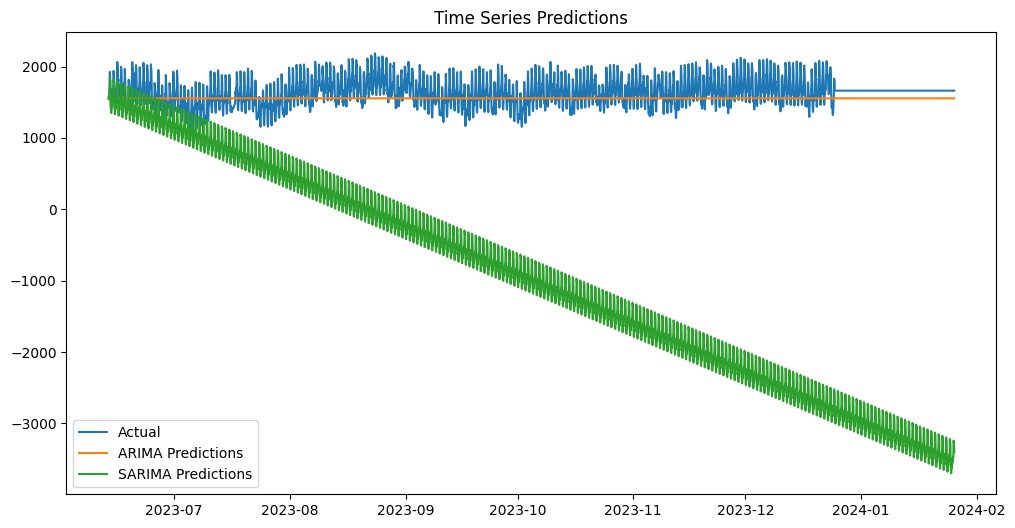

In [ ]:
# prompt: model with arima,sarima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example ARIMA model
# Find optimal (p, d, q) values through ACF and PACF plots or other methods
model_arima = ARIMA(y_train, order=(5,1,0)) # Example order, adjust as needed
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Make predictions
predictions_arima = model_arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Example SARIMA model
# Find optimal (p, d, q) and (P, D, Q, s) values through ACF and PACF plots or other methods
model_sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)) # Example order and seasonality, adjust
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

# Make predictions
predictions_sarima = model_sarima_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

# Evaluate the models (example using Mean Absolute Error)
from sklearn.metrics import mean_absolute_error

mae_arima = mean_absolute_error(y_test, predictions_arima)
mae_sarima = mean_absolute_error(y_test, predictions_sarima)

print(f"ARIMA MAE: {mae_arima}")
print(f"SARIMA MAE: {mae_sarima}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions_arima, label='ARIMA Predictions')
plt.plot(y_test.index, predictions_sarima, label='SARIMA Predictions')
plt.legend()
plt.title('Time Series Predictions')
plt.show()

Random Forest MAE: 27.34415657430789


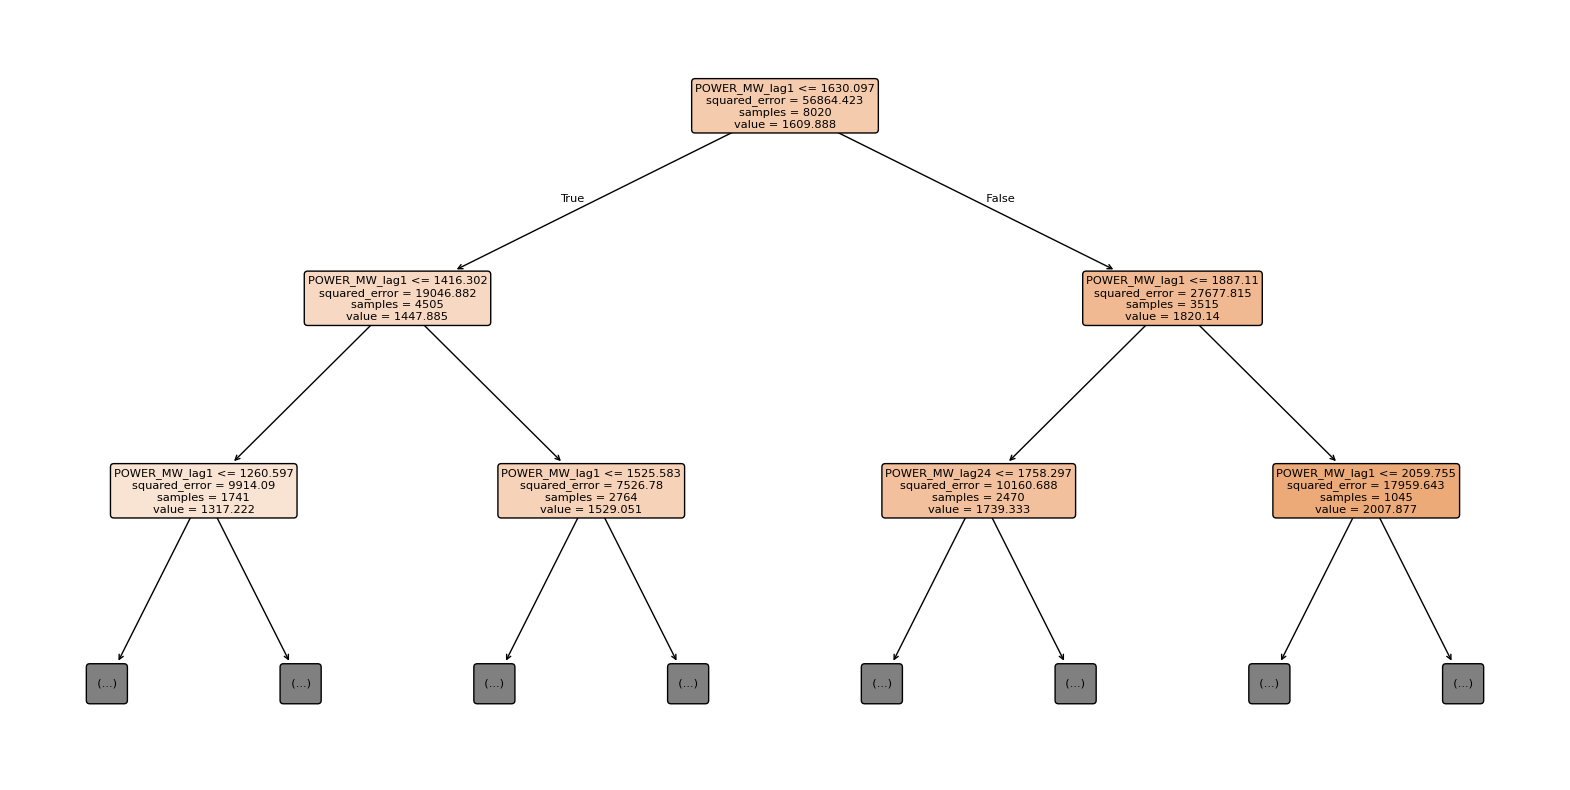

In [ ]:
# prompt: model with random forest and visualize the random forest tree

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# ... (Your existing code)

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, rf_predictions)
print(f"Random Forest MAE: {mae_rf}")


# Visualize one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, rounded=True, max_depth=2) # Change max_depth for visualization
plt.show()

HistGradientBoostingRegressor MAE: 25.779706895897753


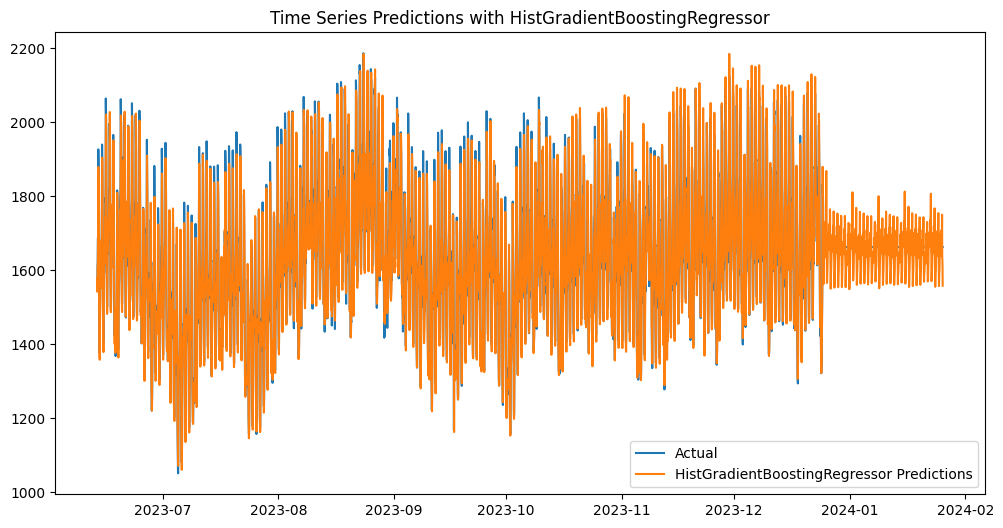

In [ ]:
# prompt: model with hist gradient boosting regressor

from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize and train a HistGradientBoostingRegressor
hgb_model = HistGradientBoostingRegressor(max_iter=100, random_state=42) # You can adjust max_iter
hgb_model.fit(X_train, y_train)

# Make predictions
hgb_predictions = hgb_model.predict(X_test)

# Evaluate the model
mae_hgb = mean_absolute_error(y_test, hgb_predictions)
print(f"HistGradientBoostingRegressor MAE: {mae_hgb}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, hgb_predictions, label='HistGradientBoostingRegressor Predictions')
plt.legend()
plt.title('Time Series Predictions with HistGradientBoostingRegressor')
plt.show()

HistGradientBoostingRegressor MAE: 30.278316001865083


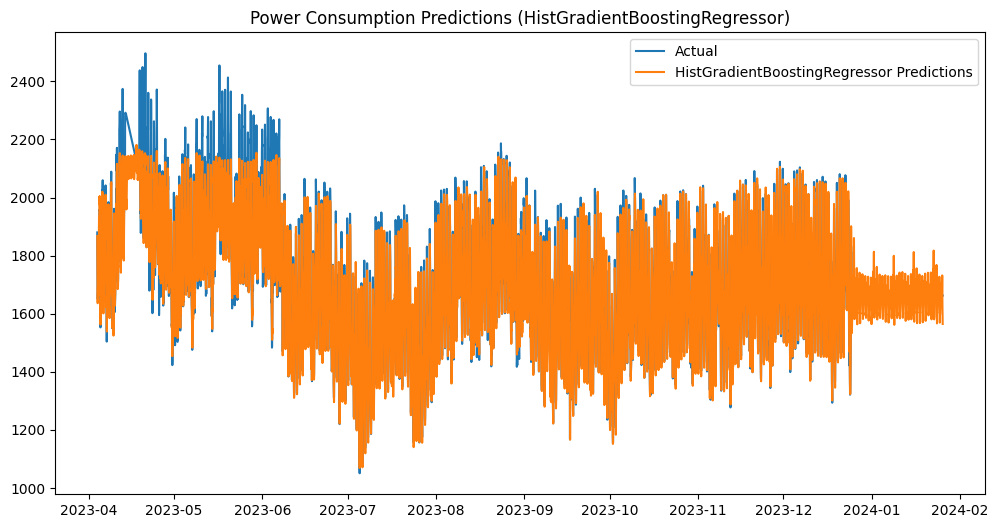

<ipython-input-39-4040f2da82fa>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['power_category'] = pd.cut(train_data['POWER_MW'], bins=3, labels = [0,1,2])
<ipython-input-39-4040f2da82fa>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['power_category'] = pd.cut(test_data['POWER_MW'], bins=3, labels = [0,1,2])


HistGradientBoostingClassifier Accuracy: 0.6588103254769921


In [ ]:


from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier

# ... (Your existing code)

# Prepare the data for the HistGradientBoostingRegressor model
features = ['Temp_FC', 'Rain_FC', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'POWER_MW_lag1', 'POWER_MW_lag24', 'POWER_MW_rolling_avg_24h', 'Temp_FC_rolling_avg_7d']
target = 'POWER_MW'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and train the HistGradientBoostingRegressor model
hgb_regressor = HistGradientBoostingRegressor(max_iter=100, random_state=42) # You can tune hyperparameters
hgb_regressor.fit(X_train, y_train)

# Make predictions
hgb_predictions = hgb_regressor.predict(X_test)

# Evaluate the model
hgb_error = mean_absolute_error(y_test, hgb_predictions)
print(f'HistGradientBoostingRegressor MAE: {hgb_error}')

# Plot the predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, hgb_predictions, label='HistGradientBoostingRegressor Predictions')
plt.legend()
plt.title('Power Consumption Predictions (HistGradientBoostingRegressor)')
plt.show()


# Example usage of HistGradientBoostingClassifier (assuming you have a classification task)

#  Let's create a dummy classification target for demonstration:
#  Replace this with your actual classification target
train_data['power_category'] = pd.cut(train_data['POWER_MW'], bins=3, labels = [0,1,2])
test_data['power_category'] = pd.cut(test_data['POWER_MW'], bins=3, labels = [0,1,2])

# Prepare the data
X_train_clf = train_data[features]
y_train_clf = train_data['power_category']
X_test_clf = test_data[features]
y_test_clf = test_data['power_category']

# Initialize and train the HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hgb_classifier.fit(X_train_clf, y_train_clf)

# Make predictions
hgb_clf_predictions = hgb_classifier.predict(X_test_clf)

# Evaluate the classifier (e.g., using accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_clf, hgb_clf_predictions)
print(f'HistGradientBoostingClassifier Accuracy: {accuracy}')

XGBoost MAE: 32.55162019775125


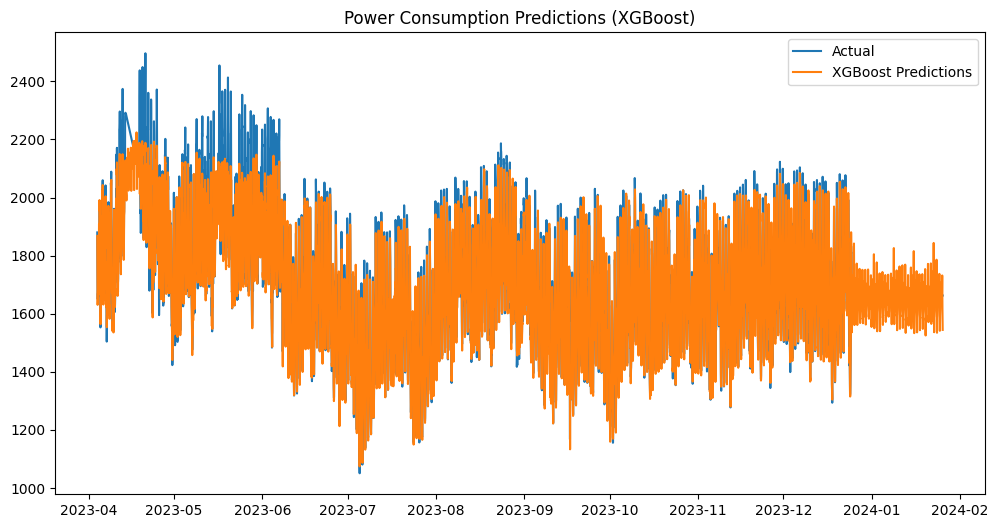

In [ ]:


import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Prepare the data for the XGBoost model
features = ['Temp_FC', 'Rain_FC', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'POWER_MW_lag1', 'POWER_MW_lag24', 'POWER_MW_rolling_avg_24h', 'Temp_FC_rolling_avg_7d']
target = 'POWER_MW'

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42) # You can tune hyperparameters
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_error = mean_absolute_error(y_test, xgb_predictions)
print(f'XGBoost MAE: {xgb_error}')

# Plot the predictions against actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, xgb_predictions, label='XGBoost Predictions')
plt.legend()
plt.title('Power Consumption Predictions (XGBoost)')
plt.show()

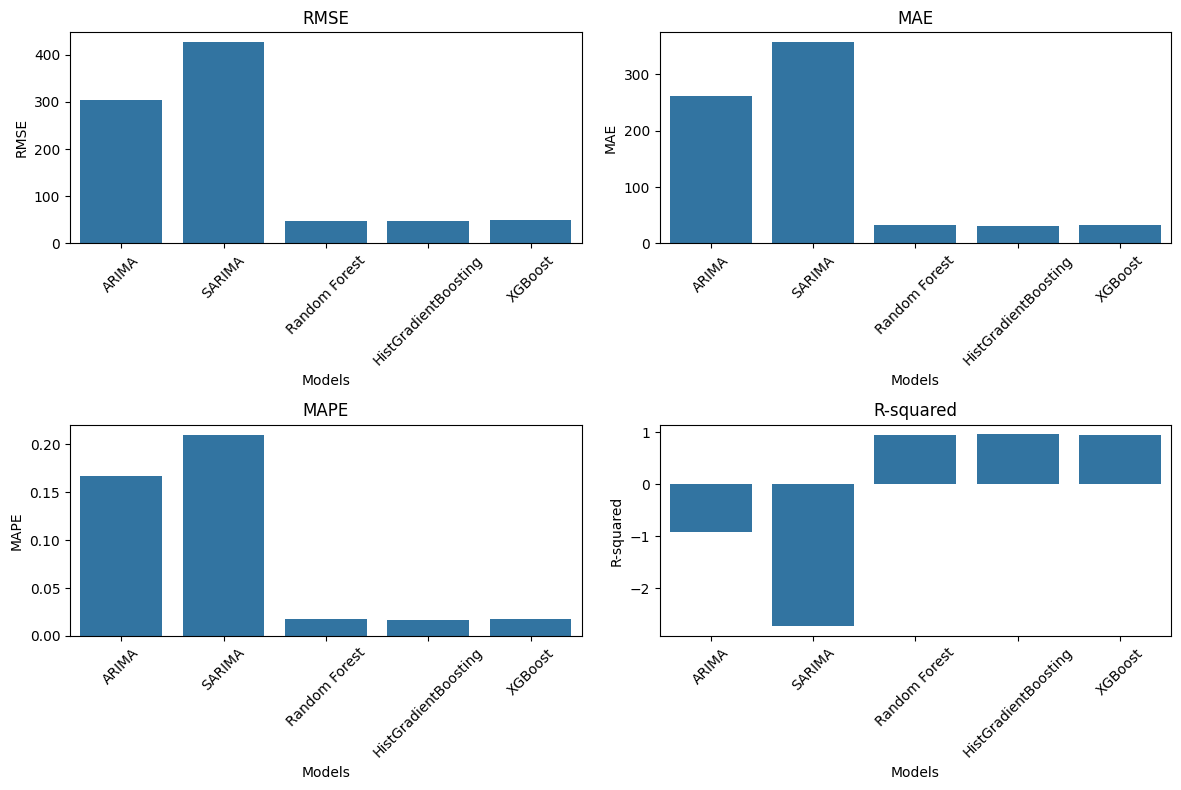

Evaluation Metrics for ARIMA:
	RMSE: 304.5775066536004
	MAE: 262.0959420020671
	MAPE: 0.16702662333866905
	R-squared: -0.9107567859740426
Evaluation Metrics for SARIMA:
	RMSE: 425.6660047123614
	MAE: 356.7403797582436
	MAPE: 0.20975548458143534
	R-squared: -2.732052038344176
Evaluation Metrics for Random Forest:
	RMSE: 48.553208479588235
	MAE: 32.095580083801984
	MAPE: 0.0181497671343719
	R-squared: 0.9514436956784617
Evaluation Metrics for HistGradientBoosting:
	RMSE: 46.89757489540958
	MAE: 30.278316001865083
	MAPE: 0.01705900845804278
	R-squared: 0.9546987143254587
Evaluation Metrics for XGBoost:
	RMSE: 50.47835650100075
	MAE: 32.55162019775125
	MAPE: 0.01824624523448896
	R-squared: 0.9475168166199595


In [ ]:

# Mean Absolute Error
# Mean Absolute Percentage Error
# Mean Squared Error
# Root Mean Squared Error
# Normalized Root Mean Squared Error
# Weighted Absolute Percentage Error
# Weighted Mean Absolute Percentage Error with all model with plot

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

def evaluate_models(y_true, y_preds):
    """
    Evaluates multiple regression models using various performance metrics.

    Args:
        y_true: True target values.
        y_preds: Dictionary of model names and their predictions.

    Returns:
      A dictionary where keys are model names and values are dictionaries of evaluation metrics.
    """

    results = {}
    for model_name, y_pred in y_preds.items():
        results[model_name] = {
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAE': mean_absolute_error(y_true, y_pred),
            'MAPE': mean_absolute_percentage_error(y_true, y_pred),
            'R-squared': r2_score(y_true, y_pred),
        }
    return results

def plot_evaluation_results(results, y_test):
    # Plotting the evaluation results
    metrics = ['RMSE', 'MAE', 'MAPE', 'R-squared']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.ravel() # Flatten the axes array for easier iteration

    for i, metric in enumerate(metrics):
        model_names = list(results.keys())
        metric_values = [results[model][metric] for model in model_names]

        sns.barplot(x=model_names, y=metric_values, ax=axes[i])
        axes[i].set_title(f"{metric}")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel("Models")

    plt.tight_layout()
    plt.show()


# Example Usage (assuming you have y_test and predictions from each model)
y_true = test_data['POWER_MW']

y_preds = {
    'ARIMA': arima_predictions,
    'SARIMA': sarima_predictions,
    'Random Forest': rf_predictions,
    'HistGradientBoosting': hgb_predictions,
    'XGBoost': xgb_predictions,
}

evaluation_results = evaluate_models(y_true, y_preds)
plot_evaluation_results(evaluation_results, y_true)

for model, metrics in evaluation_results.items():
  print(f"Evaluation Metrics for {model}:")
  for metric, value in metrics.items():
    print(f"\t{metric}: {value}")


In [ ]:


# Assuming 'df' is your DataFrame with the processed data

# Filter the DataFrame for the specified date range
start_date = '2023-12-25 00:00:00'
end_date = '2024-01-25 23:00:00'
filtered_df = df.loc[start_date:end_date]

# Create a new column combining date and hour
filtered_df['Date_Hour'] = filtered_df.index.strftime('%Y-%m-%d %H:%M:%S')

# Select the desired columns
excel_df = filtered_df[['Date_Hour', 'POWER_MW']].copy()

# Save to an Excel file
excel_df.to_excel('extracted_data.xlsx', index=False)

<ipython-input-42-6a3e9f03b6de>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date_Hour'] = filtered_df.index.strftime('%Y-%m-%d %H:%M:%S')
